## installing lib

https://github.com/TA-Lib/ta-lib-python

In [1]:
pip install nsedt

In [2]:
from nsedt import equity as eq
from datetime import date

In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-08-04 06:53:17--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-04 06:53:17--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-08-04 06:53:17--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [ ]:
pip install --upgrade mplfinance

In [ ]:
import numpy as np
import talib
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

## function to get data

In [ ]:
def get_nifty_data(start_date, end_date):
    nifty_ticker = "^NSEI"  # Nifty ticker symbol on Yahoo Finance
    nifty = yf.download(nifty_ticker, start=start_date, end=end_date)
    return nifty


In [ ]:
start_date = "2022-01-01"
end_date = "2023-07-17"
nd = get_nifty_data(start_date, end_date)
nd

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900


In [ ]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2022-01-03 to 2023-07-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       380 non-null    float64
 1   High       380 non-null    float64
 2   Low        380 non-null    float64
 3   Close      380 non-null    float64
 4   Adj Close  380 non-null    float64
 5   Volume     380 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.8 KB


# rsi - overbought & oversold

In [ ]:
def add_rsi_column(data):
    rsi_period = 14  # RSI calculation period

    # Calculate RSI using the `ta` library
    rsi = talib.RSI(data['Close'], timeperiod=rsi_period)
    data['RSI'] = rsi

    # Add column indicating overbought (70+), neutral (between 30 and 70), and oversold (below 30) levels
    data['RSI State'] = 'Neutral'
    data.loc[data['RSI'] >= 70, 'RSI State'] = 'Overbought'
    data.loc[data['RSI'] <= 30, 'RSI State'] = 'Oversold'

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['RSI'], label='RSI')
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
    plt.title('Nifty RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

    return data


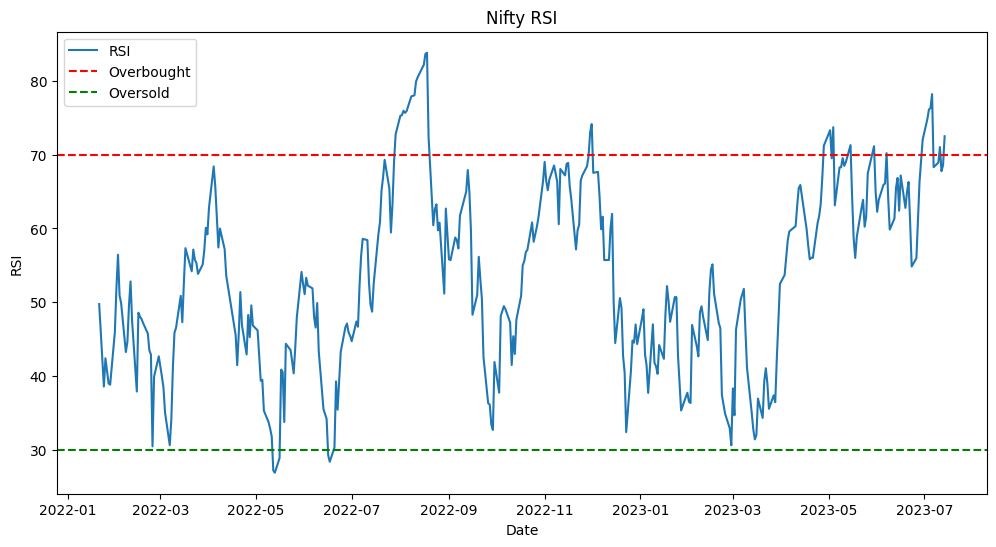

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI State
Date,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,Neutral
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,Neutral
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,Neutral
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,Neutral
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,Neutral
...,...,...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,68.931986,Neutral
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,71.037544,Overbought
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,67.773469,Neutral


In [ ]:
# Add RSI column to the DataFrame and plot the graph
nifty_data = add_rsi_column(nd)
nifty_data

# wma , ema 30 , ema 50 , ema 90 - short term and long term trend

In [ ]:

def add_ma(data):
    wma_period = 5  # WMA calculation period
    ema_period_30 = 30  # EMA calculation period (30-day)
    ema_period_50 = 50  # EMA calculation period (50-day)
    ema_period_90 = 90  # EMA calculation period (90-day)
    ema_period_150 = 150  # EMA calculation period (90-day)

    # Calculate WMA, EMA, and maximum value using the `talib` library
    data['WMA'] = talib.WMA(data['Close'], timeperiod=wma_period)
    data['EMA_30'] = talib.EMA(data['Close'], timeperiod=ema_period_30)
    data['EMA_50'] = talib.EMA(data['Close'], timeperiod=ema_period_50)
    data['EMA_90'] = talib.EMA(data['Close'], timeperiod=ema_period_90)
    #data['Max'] = data[[ 'EMA_50', 'EMA_90' , 'EMA_150']].max(axis=1)

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['WMA'], label='WMA')
    plt.plot(data.index, data['EMA_30'], label='EMA 30')
    plt.plot(data.index, data['EMA_50'], label='EMA 50')
    plt.plot(data.index, data['EMA_90'], label='EMA 90')
    # plt.plot(data.index, data['Max'], label='Max')
    plt.title('Technical Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    return data


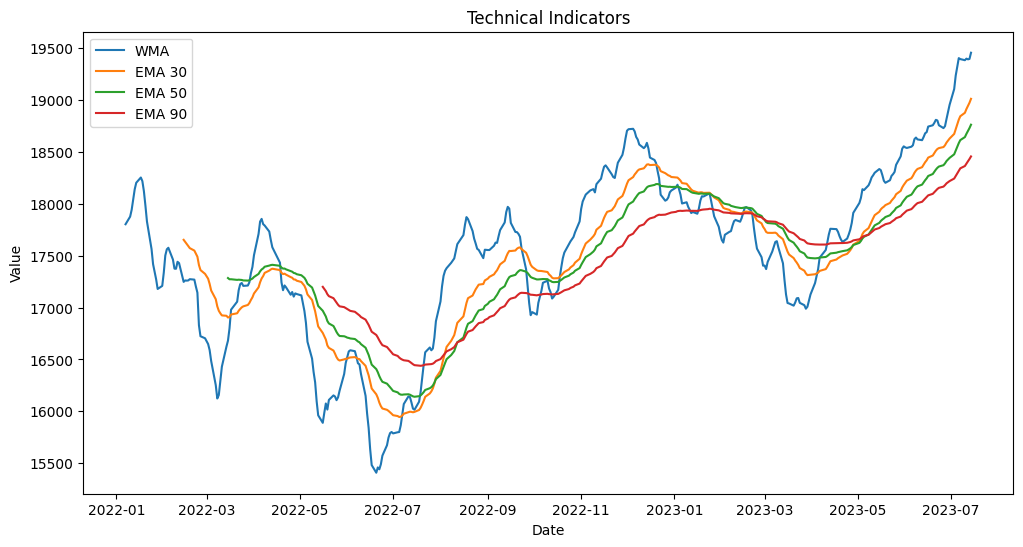

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI State,WMA,EMA_30,EMA_50,EMA_90
Date,,,,,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,Neutral,NaN,NaN,NaN,NaN
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,Neutral,NaN,NaN,NaN,NaN
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,Neutral,NaN,NaN,NaN,NaN
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,Neutral,NaN,NaN,NaN,NaN
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,Neutral,17803.936458,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,68.931986,Neutral,19385.640495,18878.423231,18644.248104,18365.310044
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,71.037544,Overbought,19400.607161,18914.615306,18675.430547,18388.916425
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,67.773469,Neutral,19393.847266,18944.917595,18703.229380,18410.793005


In [ ]:
# Example usage
# Assuming you have a DataFrame named `nifty_data` containing the necessary data
nd_with_ma = add_ma(nifty_data)
nd_with_ma

# OBV -VOL analysis confirmation of trend

In [ ]:
def add_obv_column(data):
    obv = talib.OBV(data['Close'], data['Volume'])
    data['OBV'] = obv

    # Add column indicating bullish, neutral, or bearish
    data['OBV State'] = 'Neutral'
    data.loc[data['OBV'] > data['OBV'].shift(1), 'OBV State'] = 'Bullish'
    data.loc[data['OBV'] < data['OBV'].shift(1), 'OBV State'] = 'Bearish'

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['OBV'])
    plt.title('On-Balance Volume (OBV)')
    plt.xlabel('Date')
    plt.ylabel('OBV')
    plt.show()

    return data


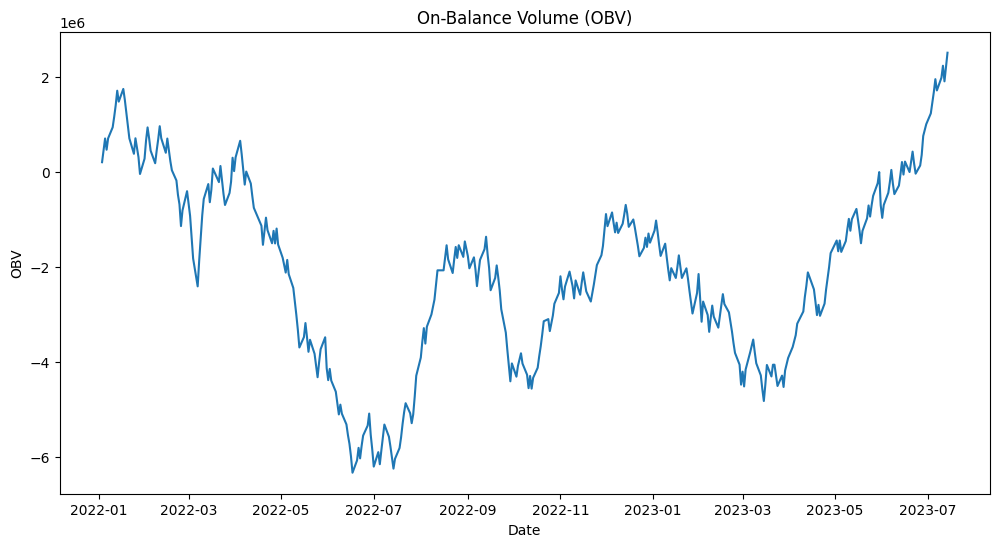

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI State,WMA,EMA_30,EMA_50,EMA_90,OBV,OBV State
Date,,,,,,,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,Neutral,NaN,NaN,NaN,NaN,200500.0,Neutral
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,Neutral,NaN,NaN,NaN,NaN,447900.0,Bullish
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,Neutral,NaN,NaN,NaN,NaN,699400.0,Bullish
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,Neutral,NaN,NaN,NaN,NaN,462900.0,Bearish
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,Neutral,17803.936458,NaN,NaN,NaN,702200.0,Bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,68.931986,Neutral,19385.640495,18878.423231,18644.248104,18365.310044,1977100.0,Bullish
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,71.037544,Overbought,19400.607161,18914.615306,18675.430547,18388.916425,2228400.0,Bullish
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,67.773469,Neutral,19393.847266,18944.917595,18703.229380,18410.793005,1900500.0,Bearish


In [ ]:
# Example usage
# Assuming you have a DataFrame named `nifty_data` containing the necessary data
nifty_data_with_obv = add_obv_column(nifty_data)
nifty_data_with_obv

# ADX

In [ ]:

def add_adx_column(data):
    adx_period = 10  # ADX calculation period

    # Calculate ADX using the `talib` library
    adx = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=adx_period)
    data['ADX'] = adx

    # Add column indicating the strength of the trend
    data['Trend Strength'] = 'Weak'
    data.loc[data['ADX'] >= 25, 'Trend Strength'] = 'Moderate'
    data.loc[data['ADX'] >= 50, 'Trend Strength'] = 'Strong'

    # Calculate DMI (+) and DMI (-)
    dmi_plus = talib.PLUS_DM(data['High'], data['Low'], timeperiod=adx_period)
    dmi_minus = talib.MINUS_DM(data['High'], data['Low'], timeperiod=adx_period)
    data['DMI (+)'] = dmi_plus
    data['DMI (-)'] = dmi_minus

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['ADX'], label='ADX')
    plt.plot(data.index, data['DMI (+)'], label='DMI (+)')
    plt.plot(data.index, data['DMI (-)'], label='DMI (-)')
    plt.title('Average Directional Index (ADX)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    return data


In [ ]:
# Example usage
# Assuming you have a DataFrame named `nifty_data` containing the necessary data
nifty_data_with_adx = add_adx_column(nifty_data)
nifty_data_with_adx

# BB

In [ ]:
def add_bollinger_bands(data):
    # Calculate Bollinger Bands using the `talib` library
    upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20)

    # Add Bollinger Bands columns to the DataFrame
    data['Upper Band'] = upper
    data['Middle Band'] = middle
    data['Lower Band'] = lower

    # Add column indicating volatility, strength, or weakness of the trend
    data['Trend Strength'] = 'Neutral'
    data.loc[data['Close'] > upper, 'Trend Strength'] = 'Strong Uptrend'
    data.loc[data['Close'] < lower, 'Trend Strength'] = 'Strong Downtrend'
    data.loc[(data['Close'] > lower) & (data['Close'] < middle), 'Trend Strength'] = 'Weak Uptrend'
    data.loc[(data['Close'] < upper) & (data['Close'] > middle), 'Trend Strength'] = 'Weak Downtrend'

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close')
    plt.plot(data.index, upper, label='Upper Band')
    plt.plot(data.index, middle, label='Middle Band')
    plt.plot(data.index, lower, label='Lower Band')
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return data



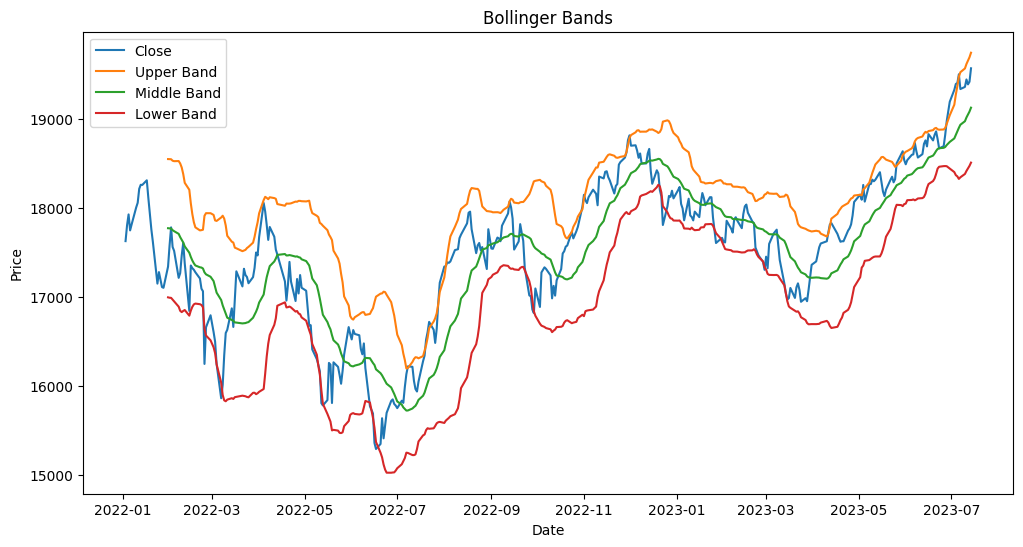

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI State,WMA,EMA_30,EMA_50,EMA_90,OBV,OBV State,Upper Band,Middle Band,Lower Band,Trend Strength
Date,,,,,,,,,,,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,Neutral,NaN,NaN,NaN,NaN,200500.0,Neutral,NaN,NaN,NaN,Neutral
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,Neutral,NaN,NaN,NaN,NaN,447900.0,Bullish,NaN,NaN,NaN,Neutral
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,Neutral,NaN,NaN,NaN,NaN,699400.0,Bullish,NaN,NaN,NaN,Neutral
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,Neutral,NaN,NaN,NaN,NaN,462900.0,Bearish,NaN,NaN,NaN,Neutral
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,Neutral,17803.936458,NaN,NaN,NaN,702200.0,Bullish,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,68.931986,Neutral,19385.640495,18878.423231,18644.248104,18365.310044,1977100.0,Bullish,19562.712437,18970.910059,18379.107680,Weak Downtrend
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,71.037544,Overbought,19400.607161,18914.615306,18675.430547,18388.916425,2228400.0,Bullish,19612.649362,19012.805078,18412.960794,Weak Downtrend
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,67.773469,Neutral,19393.847266,18944.917595,18703.229380,18410.793005,1900500.0,Bearish,19650.654428,19046.212598,18441.770767,Weak Downtrend


In [ ]:
# Example usage
# Assuming you have a DataFrame named `nifty_data` containing the necessary data
nifty_data_with_bollinger_bands = add_bollinger_bands(nifty_data)
nifty_data_with_bollinger_bands

# FIBONACCI  

In [ ]:

def add_fibonacci_bands(data):
    # Calculate Fibonacci retracement levels
    high = data['High'].max()
    low = data['Low'].min()
    range_high = high - low

    levels = [0.236, 0.382, 0.5, 0.618, 0.786]  # Fibonacci retracement levels
    bands = []

    for level in levels:
        value = high - (level * range_high)
        bands.append(value)

    # Plotting the graph
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Close')
    for band in bands:
        plt.axhline(y=band, color='r', linestyle='--', label=f'Fibonacci Band {band:.3f}')
    plt.title('Fibonacci Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return data

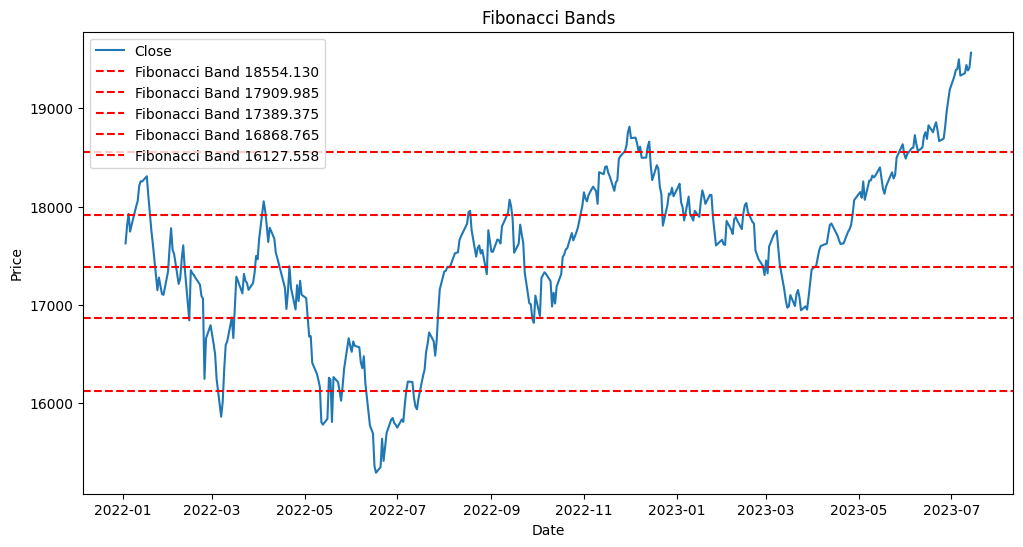

,Open,High,Low,Close,Adj Close,Volume,RSI,RSI State,WMA,EMA_30,EMA_50,EMA_90,OBV,OBV State,Upper Band,Middle Band,Lower Band,Trend Strength
Date,,,,,,,,,,,,,,,,,,
2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,NaN,Neutral,NaN,NaN,NaN,NaN,200500.0,Neutral,NaN,NaN,NaN,Neutral
2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,NaN,Neutral,NaN,NaN,NaN,NaN,447900.0,Bullish,NaN,NaN,NaN,Neutral
2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,NaN,Neutral,NaN,NaN,NaN,NaN,699400.0,Bullish,NaN,NaN,NaN,Neutral
2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,NaN,Neutral,NaN,NaN,NaN,NaN,462900.0,Bearish,NaN,NaN,NaN,Neutral
2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,NaN,Neutral,17803.936458,NaN,NaN,NaN,702200.0,Bullish,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,68.931986,Neutral,19385.640495,18878.423231,18644.248104,18365.310044,1977100.0,Bullish,19562.712437,18970.910059,18379.107680,Weak Downtrend
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,71.037544,Overbought,19400.607161,18914.615306,18675.430547,18388.916425,2228400.0,Bullish,19612.649362,19012.805078,18412.960794,Weak Downtrend
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,67.773469,Neutral,19393.847266,18944.917595,18703.229380,18410.793005,1900500.0,Bearish,19650.654428,19046.212598,18441.770767,Weak Downtrend


In [ ]:
# Example usage
# Assuming you have a DataFrame named `nifty_data` containing the necessary data
nifty_data_with_fibonacci_bands = add_fibonacci_bands(nifty_data)
nifty_data_with_fibonacci_bands

#candlesticks

In [ ]:
def plot_candlestick(data):
    # Create a candlestick chart using plotly
    fig = go.Figure(data=go.Candlestick(x=data.index,
                                       open=data['Open'],
                                       high=data['High'],
                                       low=data['Low'],
                                       close=data['Close']))

    # Customize the layout
    fig.update_layout(title='Nifty Stock Chart',
                      yaxis_title='Price')

    # Show the candlestick chart
    fig.show()

In [ ]:
# Call the plot_candlestick function with nifty_data as input
plot_candlestick(nifty_data)